<a href="https://colab.research.google.com/github/baharuluss/CNN_Clothes_Classification/blob/main/CNN_Clothes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# tensorflow datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Herlper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised= True, with_info= True)
train_ds, test_ds = dataset['train'], dataset['test']

In [ ]:
class_names = metadata.features['label'].names
print('Class names: {}'.format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of images in train set: {}'.format(num_train_examples))
print('Number of images in test set: {}'.format(num_test_examples))

Number of images in train set: 60000
Number of images in test set: 10000


In [ ]:
# function for normalizing to make it easier for the optimization algorithm to find best weights during training.
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels


train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)


# Caching will keep the dataset in memory, making training faster.
train_ds = train_ds.cache()
test_ds = test_ds.cache()

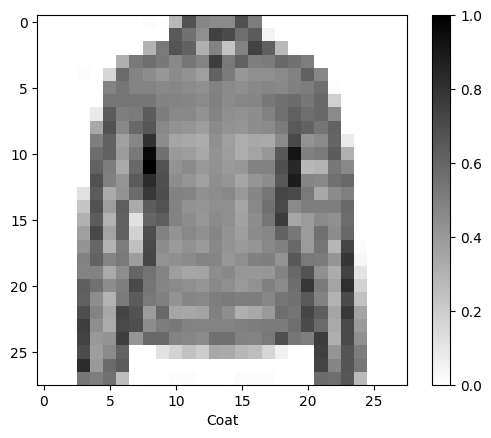

In [ ]:
for image, label in test_ds.take(1):
  break
image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[label])
plt.show()


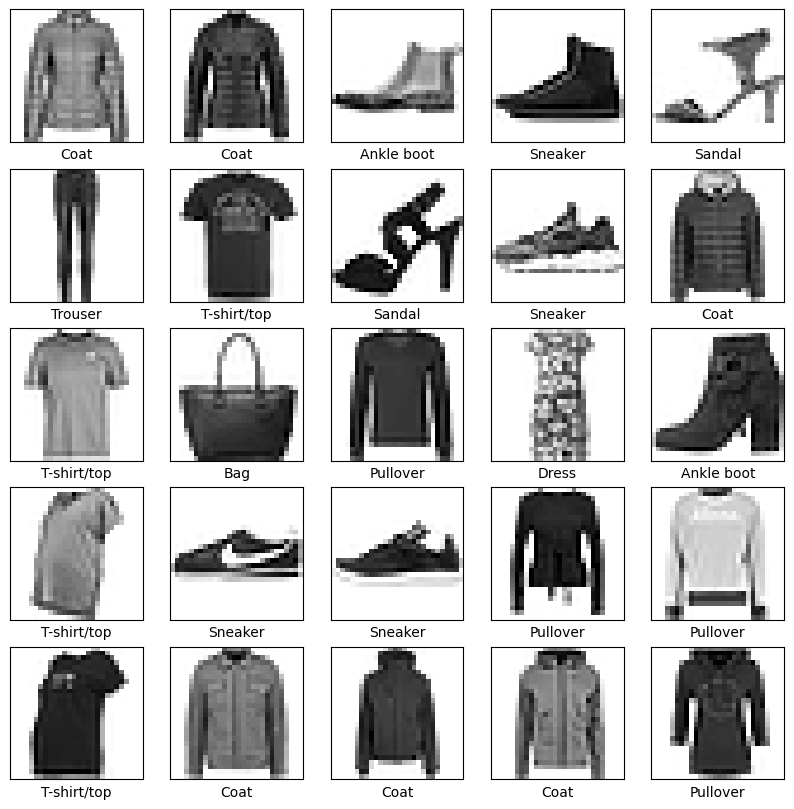

In [ ]:

plt.figure(figsize = (10,10))
for i, (image, label) in enumerate(test_ds.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(),




































              metrics = ['accuracy'])



In [ ]:
BATCH_SIZE = 32
train_ds = train_ds.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_ds = test_ds.cache().batch(BATCH_SIZE)

In [ ]:
model.fit(train_ds, epochs = 5, steps_per_epoch= math.ceil(num_train_examples/BATCH_SIZE))


Epoch 1/5
1875/1875 [==============================] - 29s 7ms/step - loss: 0.4977 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3721 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3380 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3106 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2936 - accuracy: 0.8903


In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds, steps = math.ceil(num_test_examples/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3463 - accuracy: 0.8728
Accuracy on test dataset: 0.8727999925613403


In [ ]:
for test_images, test_labels in test_ds.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 101ms/step


In [ ]:

predictions.shape

(32, 10)

In [ ]:
predictions[0]


array([5.8732135e-06, 4.0179057e-07, 1.0148004e-02, 6.0212807e-07,
       9.6643484e-01, 3.9392697e-10, 2.3374936e-02, 3.0143821e-09,
       3.5404373e-05, 1.4916363e-08], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:

test_labels[0]

4

In [ ]:

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                        color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

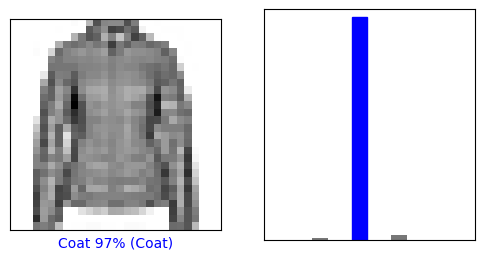

In [ ]:

i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

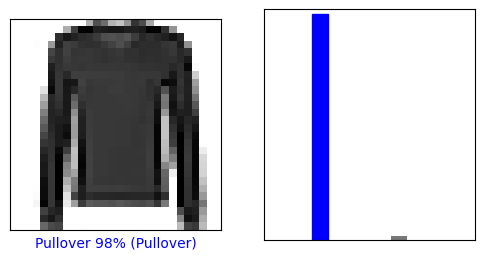

In [ ]:

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

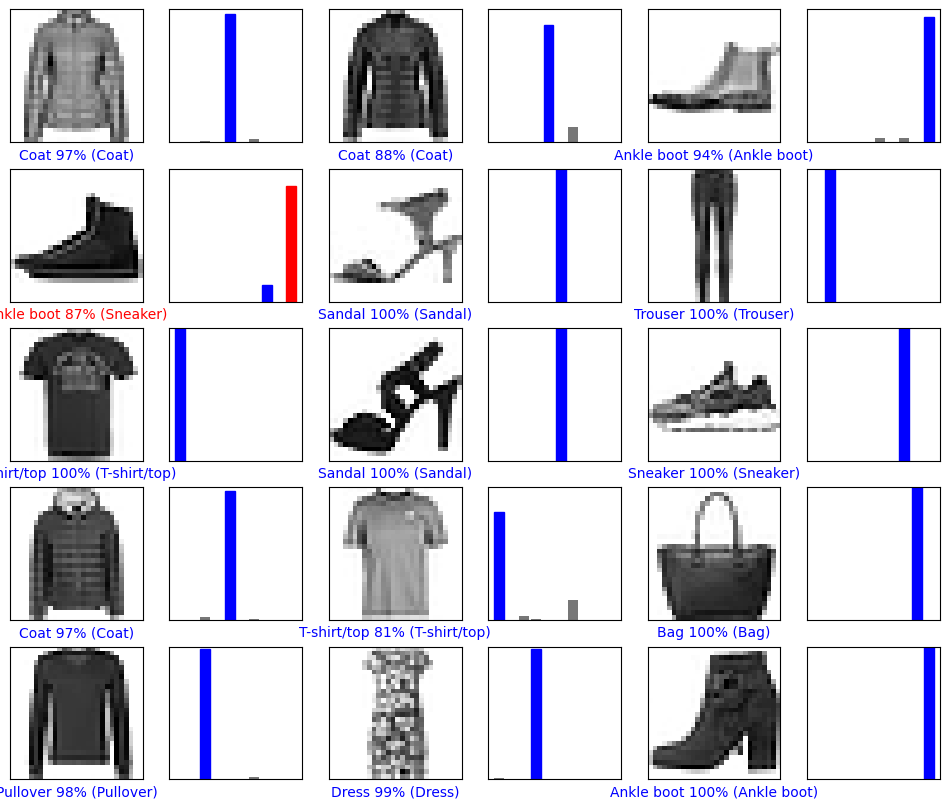

In [ ]:

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i,predictions, test_labels)

In [ ]:

img = test_images[0]
print(img.shape)

(28, 28, 1)


In [ ]:
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [ ]:

predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 65ms/step
[[5.8732026e-06 4.0178980e-07 1.0147990e-02 6.0212693e-07 9.6643484e-01
  3.9392697e-10 2.3374869e-02 3.0143763e-09 3.5404337e-05 1.4916361e-08]]


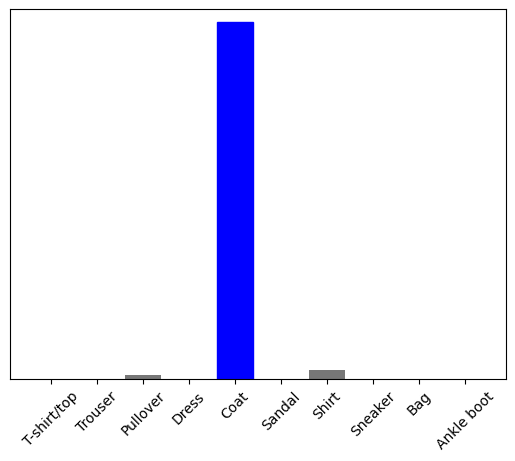

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [ ]:

np.argmax(predictions_single[0])

4

1/1 [==============================] - 0s 32ms/step


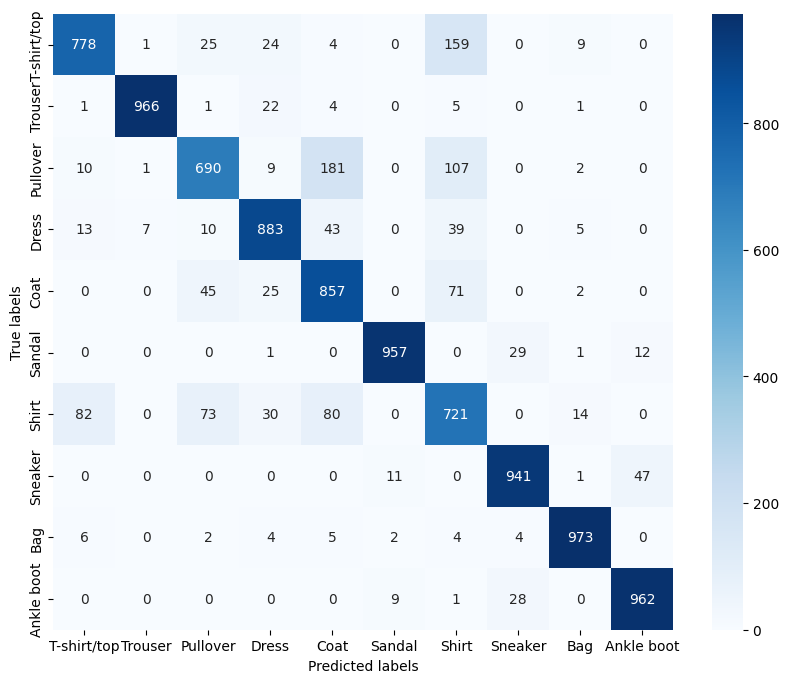

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Test veri kümesindeki tahminleri ve gerçek etiketleri toplamak
all_predictions = []
all_true_labels = []

for test_images, test_labels in test_ds:
    predictions_batch = model.predict(test_images)
    all_predictions.extend(np.argmax(predictions_batch, axis=1))
    all_true_labels.extend(test_labels.numpy())

# Confusion matrisini oluşturmak
conf_mat = confusion_matrix(all_true_labels, all_predictions)

# Heatmap ile görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
from sklearn.metrics import precision_score

# Test veri kümesindeki tahminleri ve gerçek etiketleri toplamak
all_predictions = []
all_true_labels = []

for test_images, test_labels in test_ds:
    predictions_batch = model.predict(test_images)
    all_predictions.extend(np.argmax(predictions_batch, axis=1))
    all_true_labels.extend(test_labels.numpy())

# Hassasiyet hesaplama
precision = precision_score(all_true_labels, all_predictions, average='weighted')

print('Precision:', precision)

1/1 [==============================] - 0s 33ms/step
Precision: 0.8770732861067349
